# Data Fitting Exercises

<div class="alert alert-block alert-info">

<h2>Assessment</h2><br/>

This exercise is part of your assessment. When you have finished, please save and upload your .ipynb file to Moodle.
<br/><br/>
To save, use **File > Save and Checkpoint** in the Jupyter menu.
<br/><br/>
Before saving and uploading, be sure to check that your notebook runs as expected from a fresh start (using **Kernel > Restart and Run All** from the Jupyter menu).
</div>

# 3. Non-Linear Least Squares

In Exercise 1, you used `scipy.stats.linregress` to perform a linear regression to some experimental kinetics data, modelled using the linear form of the Van't Hoff equation.

In Exercise 2, you learned how to solve the same problem by writing two functions: a model function, and an error function; then finding an optimised set of model parameters that minimise your errors, using `scipy.optimize.minimize`. 

The second approach is not restricted to fitting linear equations, and can generally be used to fit any model function to some reference dataset. In this, third, exercise, you will use the same technique to fit a **non-linear** model describing some flash photolysis data.

## Flash Photolysis

Flash photolysis is a technique for investigating fast photochemical reactions, by exposing the reactant to very brief and intense flashes of light, and then spectroscopically analysing the resulting products. The data collected give a measure of fluorescence intensity with respect to time. The time scale is usually of the order of picoseconds, while the measure of intensity is usually the photon count. 

The equation that governs a fluorescence lifetime is a biexponential — it depends on two exponential terms, and for this reason cannot be converted to a linear form by taking logs.

\begin{equation}
I \propto A_1\mathrm{e}^{-k_{1}t} + A_2\mathrm{e}^{-k_{2}t}\tag{1}.
\end{equation}

The pre-exponential factors $A_1$ and $A_2$ govern the contribution of each exponential decay (green and red line) to the overall signal. $t$ is the time, and $k_{1}$ and $k_{2}$ are the respective radiative rate constants for each lifetime.

In a bi-exponential plot such as the one displayed in the Figure below, there are three key features. The blue curve is the flash or pump signal. It is a very brief flash from the light source and will always show up in the signal. The green curve is the exponential decay signal from a short fluorescence lifetime. The red curve is the exponential decay signal from a longer fluorescence lifetime.


<img style="width:280px" src="figures/bi-exponential_plot.png"/>

The radiative rate constant for each component is related to the natural lifetime, $\tau_r$, by

\begin{equation}\tau_r = \frac{1}{k_r}\end{equation}

where the natural lifetime may be thought of as the average amount of time a molecule will remain in its excited state before it decays. By calculating $k_1$ and $k_2$, one will be able to determine the natural lifetime as

\begin{equation}k_r = k_1 + k_2\end{equation}

For an given experiment, the parameters $A_1$, $k_1$, $A_2$, and $k_2$ can be obtained by fitting Equation 1 to the experimental data. The fitted values of $k_1$ and $k_2$ can then be used to calculate the natural lifetime.

## Performing a least-squares fit to flash photolysis data

The file `data/flash_photolysis.dat` contains a set of experimental data from a flash photolysis experiment. This file looks like

```
Time (ps)  Signal (counts)
0.0  -0.002740138
0.2  0.001982640
0.4  0.014379181
0.6  0.010439134
0.8  -0.014530330
1.0  0.009097397
1.2  -0.000735803
1.4  0.011072823
1.6  -0.004858392
…
```
<div class="alert alert-success">

By copying and editing the appropriate code from Exercise 2, or writing it from scratch, read in the experimental data from <span style='font-family:monospace'>'data/flash_photolysis.dat'</span> and plot it.  <br/><br/>
To skip the first line in the data file, you can use<br/>
<span style='font-family:monospace'>np.loadtxt('data/flash_photolysis.dat', skiprows=1)</span>
</div>

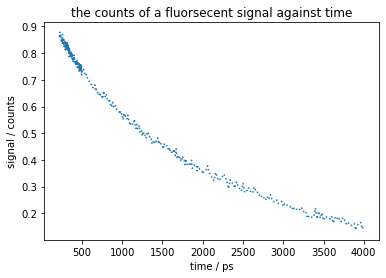

In [56]:
import numpy as np #import numpy
data = np.loadtxt('data/flash_photolysis.dat', skiprows=1) #loading table of data into workbook
time = data[:,0]
time_ps = time[200:] #loads data from 200th term onwards
signal_unslice = data[:,1]
signal = signal_unslice[200:] #ensures y column has same dimensions as x column and that data points correspond accordingly


import matplotlib.pyplot as plt #import plotting function
%matplotlib inline 

plt.plot( time_ps, signal, ':' ) #plotting graph of time in ps against signal
plt.xlabel( 'time / ps')
plt.ylabel( 'signal / counts' )
plt.title('the counts of a fluorsecent signal against time')
plt.show()

Your plot should show an initial fast rise in intensity, from zero, followed by a slower decay curve, that is approximately exponential.

<div class="alert alert-success">
By copying and editing the appropriate code from Exercise 2, or writing it from scratch, define a function <span style='font-family:monospace'>model_function()</span> that takes a set of parameters $P$ and the time $t$ as inputs, and returns the intensity as a function of time, according to equation 1. <br/><br/>
Test that your model function can approximate the experimental data by plotting the original data, and your model intensity using<br/>
$A_1=0.5$<br/>
$A_2=0.5$<br/>
$k_1=5\times10^{-4}$<br/>
$k_2=5\times10^{-4}$<br/>

</div>

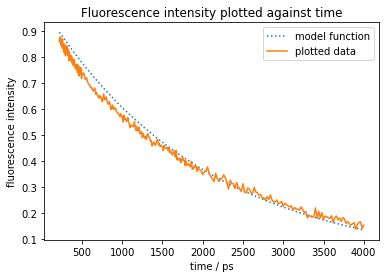

The error in the predicted y values is: 0.38548188851292103
The optimised parameters for A1, A2, k1 and k2 respectively are: [0.47172564 0.47172564 0.00047999 0.00047999]
The radiative rate constant is 0.0009599824127211062
The natural lifetime is 1041.6857504352215 ps


In [57]:
from math import e #importing math package

def model_function( P, time_ps ): #defining model function with respect to p and time
    x = np.array(time_ps)
    A1 = P[0] #setting the four variables within P of the model function
    A2 = P[1]
    k1 = P[2]
    k2 = P[3]
    y = A1 * e**(-k1*x) + A2 * e**(-k2*x) #defining the function/application of the model function
    return y

P  = [0.5, 0.5, 0.0005, 0.0005] #test of the model function using a series of numbers

import matplotlib.pyplot as plt #importing the graphical plot package
%matplotlib inline
plt.plot(time_ps, model_function(P, time_ps), ':', label='model function') #plotting the model function
plt.plot(time_ps, signal, '-', label='plotted data') #plotting the collected data
plt.xlabel( 'time / ps')
plt.ylabel( 'fluorescence intensity' )
plt.title('Fluorescence intensity plotted against time')
plt.legend()
plt.show()

def error_function( P, x, y ): #defining the error function to calculate the total error between model function and collected data
    y_predicted = model_function( P, x )
    error_terms = y - y_predicted
    total_error = np.sum( error_terms**2 )
    return total_error

P_error = error_function(P, time_ps, signal) #calculating the total error using the error function
print('The error in the predicted y values is:',P_error)

from scipy.optimize import minimize #importing the minimize function

P_initial = [1.0,1.0, 0.1, 0.1] #setting the initial parameters
other_args = time[200:], signal_unslice[200:] #setting out the other known variables
P_optimised = minimize(error_function, P, other_args, bounds=((0,1), (0,1), (0,np.inf), (0,np.inf)), tol=1e-20).x #defining the optimised function using bounds which prevent the code from failing to calculate a value due to too large values and using the tolerance to specify precision
print('The optimised parameters for A1, A2, k1 and k2 respectively are:',P_optimised)

k_r = P_optimised[2] + P_optimised[3]
print('The radiative rate constant is', k_r) #using the radiative rate constant function to calculate the value from k1 and k2

natural_lifetime = 1/k_r
print('The natural lifetime is', natural_lifetime, 'ps') #using the natural lifetime equation to calculate a value from the radiative rate constant

The reason I've included this all as one cell is because the ordered nature makes it easier for me to follow. Almost everything needed for this graph and the calculations are included in this cell. I also prefer the order of importing packages as and when necessary more helpful then combining them at the start as then I can recognise where it's needed. Of course, for more complicated, coding each function in individual cells will be easier to follow but this format for more straightforward code is easier for me to follow

<div class="alert alert-success">
By copying and editing the appropriate code from Exercise 2, or writing it from scratch, write an error function called <span style='font-family:monospace'>error_function()</span> that returns the sum of squared errors between your predicted intensity and the experimental intensity. <br/><br/>
Use the `minimize()` function from `scipy.optimize` to find the optimal parameter set to describe the experimental data. </div>

### Hints

* Equation 1 only describes the fluorescence decay. It does not include a description of the initial increase in intensity. When you perform your fit, you can limit your fitting data to the decay portion by slicing from the 200th element onwards; e.g. `data[200:]`.


* If you do not specify any additional options for `minimize`, the optimisation algorithm can try any values for the model parameters. Because the intensity model contains terms that look like $\mathrm{e}^{-x}$, if the algorithm tries negative numbers for $k_1$ or $k_2$ this can produce a result too large for the computer to describe, and give an error. In reality, we know that $k_1$ and $k_2$ must be positive. We can include this information in the function minimisation by including an additional setting that places **bounds** on the possible values of $P$:
```python
minimize( … , bounds=((0,1), (0,1), (0,np.inf), (0,np.inf)) )
```
The `bounds` argument takes a list of pairs of numbers, that specify the minimum and maximum allowed values to check. If $P$ is ordered as $(A_1, A_2, k_1, k_2)$, this example specifies that $A_1$ and $A_2$ must be between 0 and 1 (we know that the maximum intensity at $t=0$ is equal to 1), and that $k_1$ and $k_2$ must be between 0 and (positive) infinity.


* The `minimize()` function works by trying different parameter values until the result of the test function falls below a certain convergence tolerance. The default convergence settings for `minimize()` are not small enough to guarantee that you find the optimal set of parameter values. You can specify a lower tolerance setting by using the `tol` keyword:
```python
minimize( …, tol=1e-20)
```

<div class="alert alert-success">
Plot the experimental data and your fitted intensity function.<br/><br/>

Using your fitted parameters, calculate the natural lifetime.
</div>
